# Pull in Cleaned Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as snb

In [2]:
data = pd.read_csv('travelers_data_cleaned.csv')
data.head()

,Name,Scoring Average-AVG,1-Putts per Round-AVG,3-Putts per Round-AVG,Birdie or Better Conversion Percentage-%,SG: Putting-AVERAGE,One-Putt Percentage - Round 1-%,One-Putt Percentage - Round 3-%,One-Putt Percentage-%,One-Putt Percentage - Round 2-%,...,Proximity to Hole from Fringe-SCRAMBLING RANK,Scrambling Fringe (RTP Score)-AVG RTP,Scrambling from Other Locations-%,Proximity to Hole from Sand-SCRAMBLING RANK,Proximity to Hole from Rough-SCRAMBLING RANK,Scrambling from the Sand-%,Scrambling Rough (RTP Score)-AVG RTP,SG: Around-the-Green-AVERAGE,SG: Around-the-Green-TOTAL SG:ARG,AvgPointsPerGame
0,Roger Sloan,71.991,7.06,0.64,27.23,-0.635,36.90,48.61,39.37,38.46,...,80,-0.067,64.79,80,80,49.02,0.429,0.155,3.093,38.61
1,Patton Kizzire,71.875,7.46,0.32,31.64,0.537,46.83,35.19,42.74,43.59,...,182,-0.053,56.57,182,182,50.00,0.584,-0.066,-1.919,42.46
2,Emiliano Grillo,71.008,5.59,0.67,27.61,-1.127,31.48,27.78,31.17,35.47,...,216,0.294,57.63,216,216,36.67,0.527,-0.138,-3.036,47.00
3,Ryan Palmer,70.191,7.17,0.61,33.33,-0.197,39.90,39.58,40.56,37.78,...,108,0.056,61.43,108,108,51.43,0.551,-0.275,-7.430,70.64
4,Rob Oppenheim,71.287,6.84,0.55,26.73,-0.529,40.00,33.33,37.98,37.04,...,55,-0.03,52.48,55,55,60.66,0.322,0.565,18.638,54.30


In [13]:
corr = data.corr()

In [14]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))

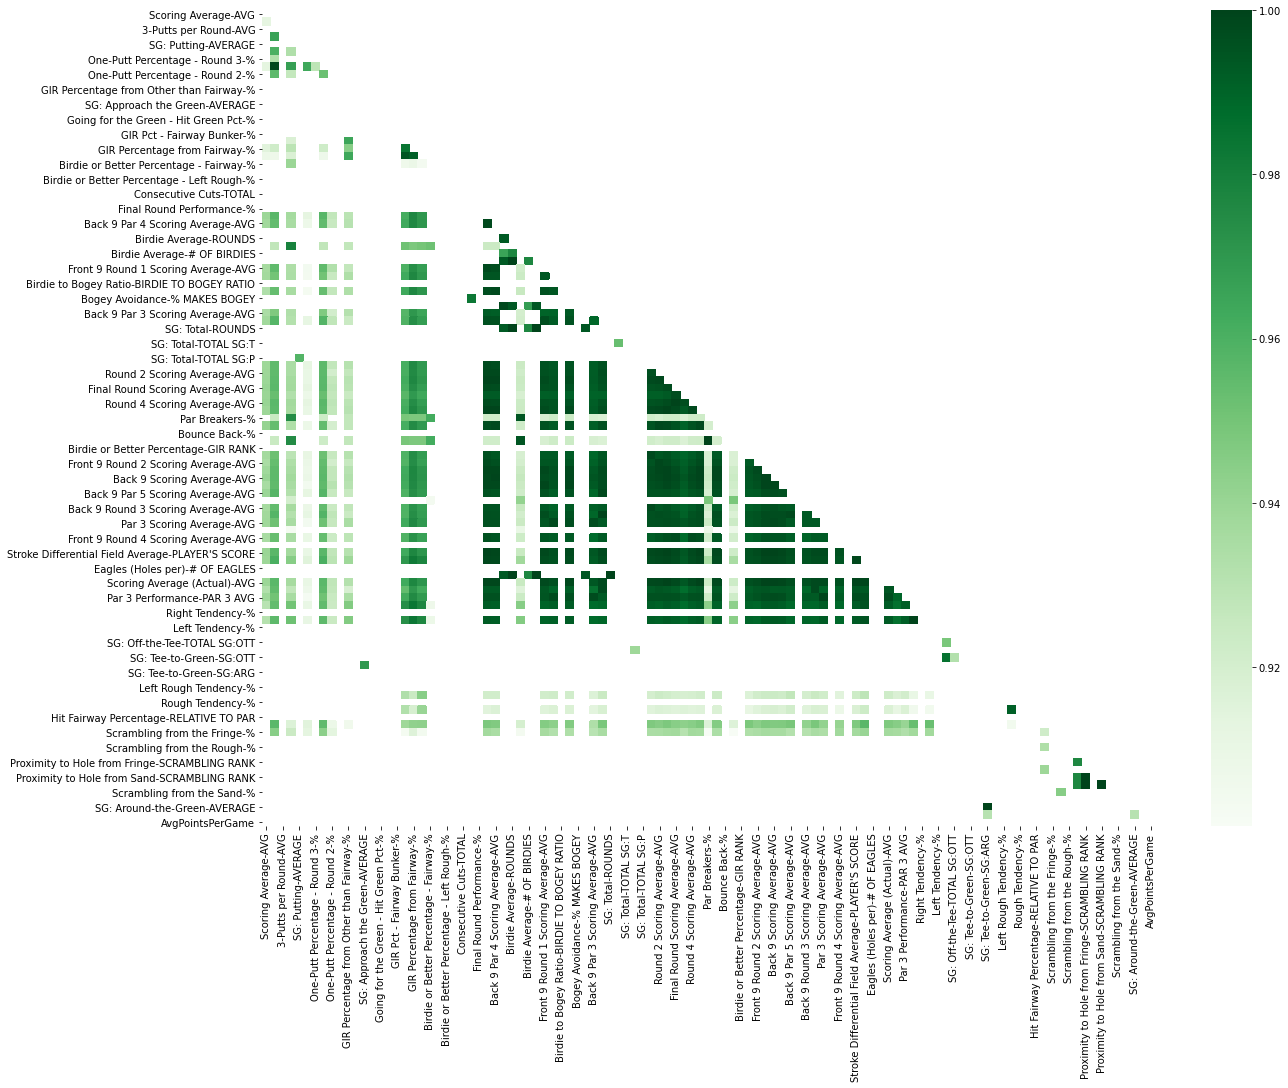

In [16]:
top_corr = corr[corr>=0.9]
pyplot.figure(figsize=(20,15))
snb.heatmap(top_corr, mask=mask, cmap='Greens')

In [5]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [6]:
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [11]:
c1 = corr.abs().unstack()

In [12]:
print(c1.sort_values(ascending=False))

AvgPointsPerGame                                    AvgPointsPerGame                                      1.000000
Par 3 Scoring Average-AVG                           Par 3 Scoring Average-AVG                             1.000000
Percentage of Yardage covered by Tee Shots-AVG (%)  Percentage of Yardage covered by Tee Shots-AVG (%)    1.000000
Par 3 Performance-PAR 3 AVG                         Par 3 Performance-PAR 3 AVG                           1.000000
Front 9 Par 5 Scoring Average-AVG                   Front 9 Par 5 Scoring Average-AVG                     1.000000
                                                                                                            ...   
Back 9 Par 4 Scoring Average-AVG                    SG: Tee-to-Green-SG:APR                               0.000009
Hit Fairway Percentage-%                            SG: Total-TOTAL SG:P                                  0.000006
SG: Total-TOTAL SG:P                                Hit Fairway Percentage-%    